In [ ]:
pip install transformers

Image Segmentation 1

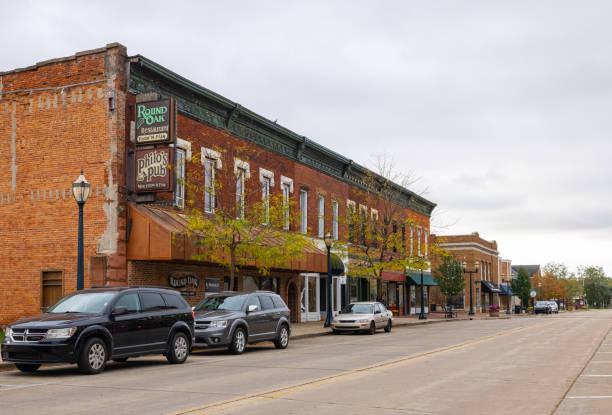

In [1]:
from transformers import pipeline
from PIL import Image
import requests

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/segmentation_input.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [2]:
semantic_segmentation = pipeline("image-segmentation", "nvidia/segformer-b1-finetuned-cityscapes-1024-1024")
results = semantic_segmentation(image)
results

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.8M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'score': None,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'traffic sign',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'terrain',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>}]

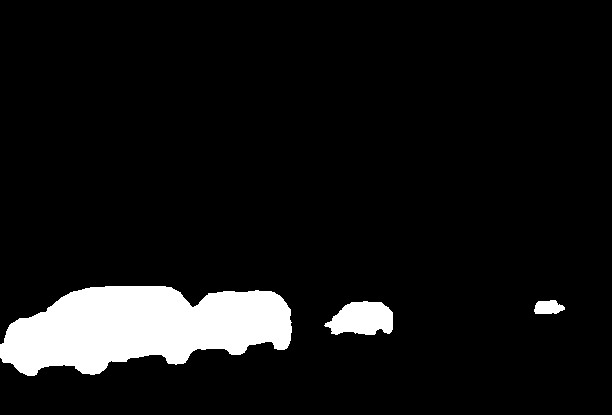

In [3]:
results[-1]["mask"]

In [4]:
instance_segmentation = pipeline("image-segmentation", "facebook/mask2former-swin-large-cityscapes-instance")
results = instance_segmentation(image)
results

config.json:   0%|          | 0.00/76.9k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/866M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/deprecation.py:165: UserWarning: The following named arguments are not valid for `Mask2FormerImageProcessor.__init__` and were ignored: '_max_size'
  return func(*args, **kwargs)
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.999944,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999945,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999652,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.903529,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=612x415>}]

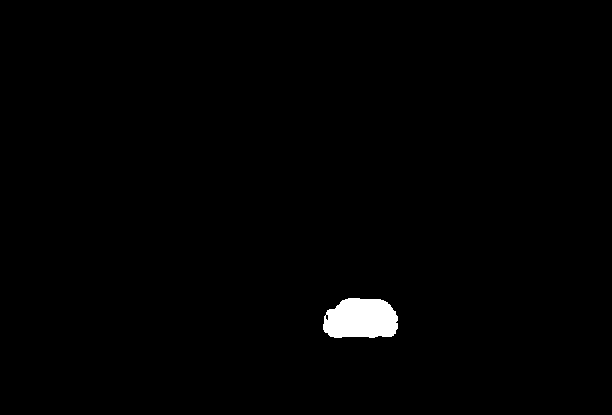

In [5]:
results[2]["mask"]

In [6]:
panoptic_segmentation = pipeline("image-segmentation", "facebook/mask2former-swin-large-cityscapes-panoptic")
results = panoptic_segmentation(image)
results

config.json:   0%|          | 0.00/77.3k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/866M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.999981,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999958,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.99997,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999575,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999958,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999634,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.996092,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999221,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.99987,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=612x415>}]

Image Segmentation 2

In [12]:
pip install transformers datasets timm


In [13]:
from transformers import SegformerForSemanticSegmentation, SegformerImageProcessor
from datasets import load_dataset
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [14]:
# Load a pretrained SegFormer model and corresponding image processor
model_name = "nvidia/segformer-b0-finetuned-ade-512-512"
model = SegformerForSemanticSegmentation.from_pretrained(model_name)
processor = SegformerImageProcessor.from_pretrained(model_name)


config.json:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/deprecation.py:165: UserWarning: The following named arguments are not valid for `SegformerImageProcessor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


In [22]:
# Load a sample image
image_path = "/content/morning-traffic-with-cars-driving-and-people-walking-along-street-M0C127.jpg"
image = Image.open(image_path).convert("RGB")

# Preprocess the image for the SegFormer model
inputs = processor(images=image, return_tensors="pt")


In [23]:
# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Get the predicted segmentation map
logits = outputs.logits  # Shape: [batch_size, num_classes, height, width]
segmentation_map = logits.argmax(dim=1).squeeze(0).cpu().numpy()


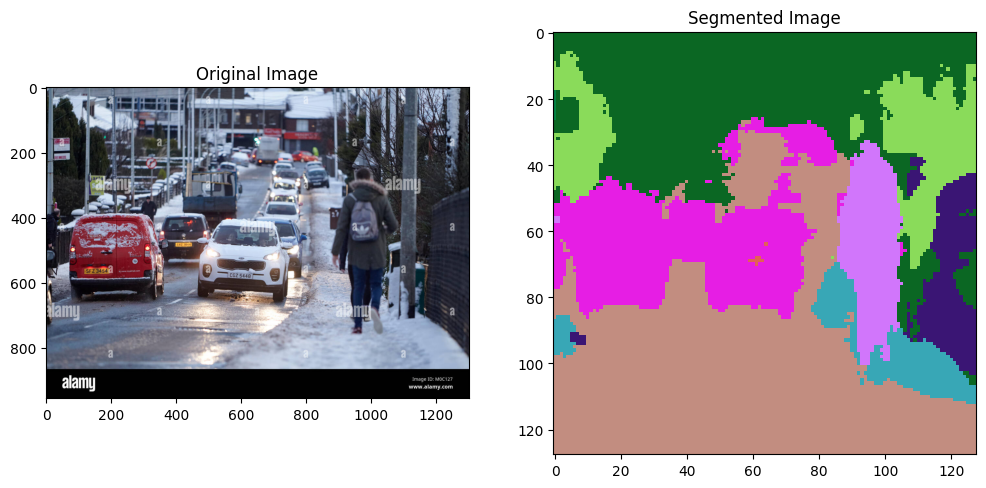

In [24]:
# Define a colormap for visualization
def decode_segmentation_map(segmentation_map, num_classes):
    colors = np.random.randint(0, 255, size=(num_classes, 3), dtype=np.uint8)
    decoded_map = colors[segmentation_map]
    return decoded_map

# Decode and plot
decoded_map = decode_segmentation_map(segmentation_map, num_classes=model.config.num_labels)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Segmented Image")
plt.imshow(decoded_map)
plt.show()
